<a href="https://colab.research.google.com/github/RMartinod/Computer-Graphics-Using-Python/blob/main/Chapter07_Scaling_in_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scaling for the curve (C_1) by a uniform scaling, obtaining a curve (C_2) three sizes larger**

In [6]:
import numpy as np, plotly.express as px
u = np.linspace(0,6*np.pi,400)
x = 11*np.cos(u) - 3*np.cos(11*u/3)
y = 11*np.sin(u) - 3*np.sin(11*u/3)
C1 = np.array([x,y,np.ones(len(x))])
SM = np.array([[3, 0, 0],
              [0, 3, 0],
              [0, 0, 1]])
C2 = np.matmul(SM,C1)
fig = px.line(x=C1[0,:],y=C1[1,:])
fig.add_trace(px.line(x=C2[0,:],y=C2[1,:]).data[0])
fig.update_traces(line_color='black',line_width=4)
fig.update_layout(title='Mandala',autosize=False)

**Scaling for the surface (S_1) by a non-uniform scaling, obtaining a curve (C_2) ten sizes shorter on x-axis and two-thirds shorter on y-axis**

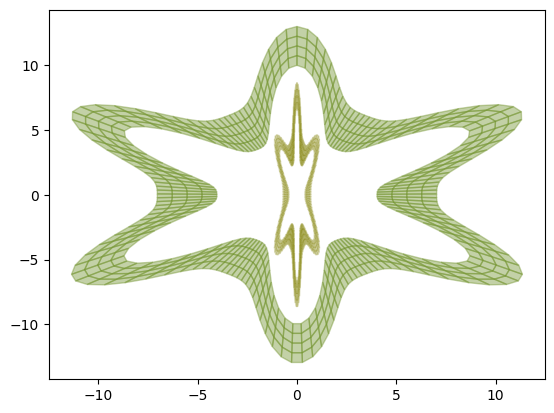

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u   = np.linspace(0,2*np.pi,150)
v   = np.linspace(2,5,5)
U,V = np.meshgrid(u,v)
X   = (V + np.cos(3*np.sin(3*U))*3 + 5) * np.sin(U)
Y   = (V + np.cos(3*np.sin(3*U))*3 + 5) * np.cos(U)
m,n = np.shape(X)
S1 = np.ones((3,m*n))
for row in range(m):
  S1[0:2,row*n:(row+1)*n] = [X[row,:],Y[row,:]]
SM = np.array([[1/10,  0, 0],
               [0,   2/3, 0],
               [0,     0, 1]])
S2 = SM@S1
X2, Y2 = np.zeros((m,n)), np.zeros((m,n))
for row in range(m):
  X2[row,:] = S2[0,row*n:(row+1)*n]
  Y2[row,:] = S2[1,row*n:(row+1)*n]
for row in range(m-1):
  for col in range(n-1):
    plt.fill([X[row,col],X[row+1,col],X[row+1,col+1],X[row,col+1]],
             [Y[row,col],Y[row+1,col],Y[row+1,col+1],Y[row,col+1]],
              color='olivedrab',alpha=.4)
    plt.fill([X2[row,col],X2[row+1,col],X2[row+1,col+1],X2[row,col+1]],
             [Y2[row,col],Y2[row+1,col],Y2[row+1,col+1],Y2[row,col+1]],
              color='olive',alpha=.2)

**Quick project**


The golden ratio (also called the golden number, or the divine proportion), is one of the most well-known and celebrated geometric and design proportions, dating back to the times of ancient Greece. Since ancient times, man has studied and theorized about aesthetics, proportions and beauty in nature and in the human body. The conclusion has been that everything seems to be made up of patterns and that these patterns could determine whether something is beautiful or not. In this way, he came to understand the golden ratio.

First, we model the Fibonacci sequence. The following four-line code gets the Fibonacci sequence (see execution in Figure 7-4).

In [ ]:
fibonacci = [0,1]
for i in range(10):
  fibonacci.append(fibonacci[-1]+fibonacci[-2])
print(fibonacci)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


Second, we model a square with unitary side. The following code plots square with unitary side (S_1), see execution in Figure 7-5.

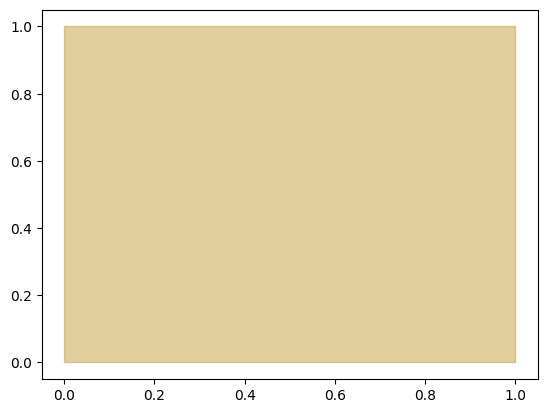

In [ ]:
import numpy as np, matplotlib.pyplot as plt
x = [0, 1, 1, 0]
y = [0, 0, 1, 1]
S1 = np.array([x,y,np.ones(len(x))])
plt.fill(S1[0,:],S1[1,:],color='darkgoldenrod',alpha=.4)

Third, we use the scaling and rotation transformations for the square model to represent the golden ratio (see execution in Figure 7-6).

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


(-133.36033893178285,
 31.536962440920025,
 -69.22575387816293,
 69.22575387816308)

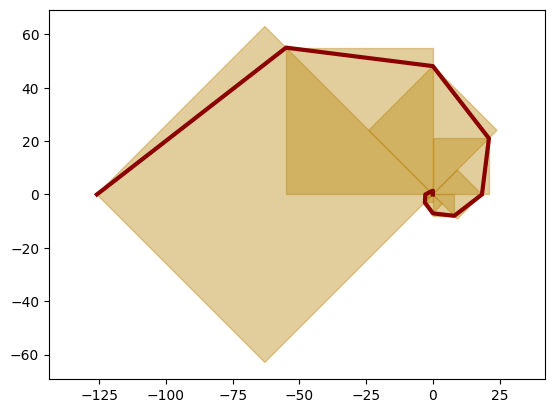

In [ ]:
import numpy as np, matplotlib.pyplot as plt
fibonacci = [0,1]
for i in range(10):
  fibonacci.append(fibonacci[-1]+fibonacci[-2])
print(fibonacci)
x = [0, 1, 1, 0]
y = [0, 0, 1, 1]
S1 = np.array([x,y,np.ones(len(x))])
xFibonacci, yFibonacci, th = [], [], 0
for number in fibonacci:
  SM = np.array([[number, 0, 0],
                 [0, number, 0],
                 [0, 0, 1]])
  RM = np.array([[np.cos(th), -np.sin(th), 0],
                 [np.sin(th),  np.cos(th), 0],
                 [0, 0, 1]])
  S2 = RM@SM@S1
  plt.fill(S2[0,:],S2[1,:],color='darkgoldenrod',alpha=.4)
  xFibonacci.append(S2[0,2])
  yFibonacci.append(S2[1,2])
  th += np.pi/4
plt.plot(xFibonacci,yFibonacci,linewidth=3,color='darkred')
plt.axis('equal')